In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
df=pd.read_csv('/content/Processed_Train_001.csv')


In [3]:
df.head()

,ID,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [4]:
df['ID'].value_counts()

69    362
92    341
96    336
67    313
83    293
     ... 
24    147
57    137
70    137
91    135
39    128
Name: ID, Length: 100, dtype: int64

## Prediction for engine ID 10, for Train(00)

In [5]:
# select ID 10
df=df.loc[df['ID']==10]

In [6]:
df.head()

,ID,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
1914,10,1,641.92,1587.93,1392.20,554.37,2388.00,47.05,522.54,2388.01,8.4039,391,39.04,23.5309,221
1915,10,2,642.22,1586.81,1392.03,554.76,2388.06,47.20,523.04,2388.04,8.3868,390,39.05,23.3106,220
1916,10,3,642.16,1581.06,1395.51,554.42,2388.01,47.19,522.22,2387.97,8.4422,392,39.01,23.5053,219
1917,10,4,642.14,1590.17,1388.15,554.19,2387.99,47.11,522.51,2388.03,8.3928,391,38.83,23.3314,218
1918,10,5,642.13,1581.09,1396.37,554.26,2387.96,47.20,522.29,2388.01,8.3879,392,39.06,23.4651,217


In [7]:
df.shape

(222, 15)

In [8]:
df.isna().sum()

ID                 0
Cycle              0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure15    0
SensorMeasure17    0
SensorMeasure20    0
SensorMeasure21    0
RUL                0
dtype: int64

In [9]:
df=df.drop(columns=['ID'])

In [10]:
df.head()

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
1914,1,641.92,1587.93,1392.20,554.37,2388.00,47.05,522.54,2388.01,8.4039,391,39.04,23.5309,221
1915,2,642.22,1586.81,1392.03,554.76,2388.06,47.20,523.04,2388.04,8.3868,390,39.05,23.3106,220
1916,3,642.16,1581.06,1395.51,554.42,2388.01,47.19,522.22,2387.97,8.4422,392,39.01,23.5053,219
1917,4,642.14,1590.17,1388.15,554.19,2387.99,47.11,522.51,2388.03,8.3928,391,38.83,23.3314,218
1918,5,642.13,1581.09,1396.37,554.26,2387.96,47.20,522.29,2388.01,8.3879,392,39.06,23.4651,217


## Some Visualz

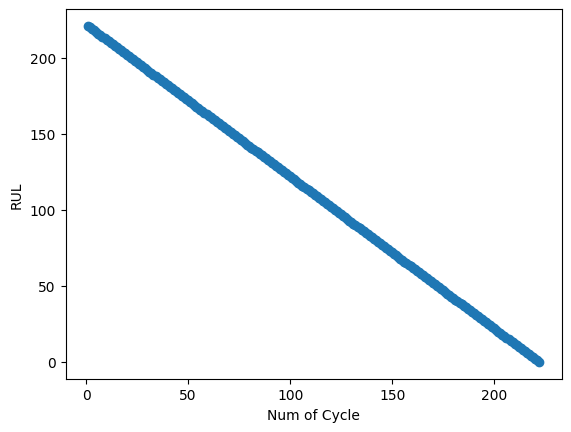

In [11]:
plt.scatter(df['Cycle'],df['RUL'])
plt.xlabel('Num of Cycle')
plt.ylabel('RUL')
plt.show()

** Here we can observe that With each cycle RUL of an engine is descreasing

In [12]:
df.columns

Index(['Cycle', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4',
       'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure11',
       'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure15',
       'SensorMeasure17', 'SensorMeasure20', 'SensorMeasure21', 'RUL'],
      dtype='object')

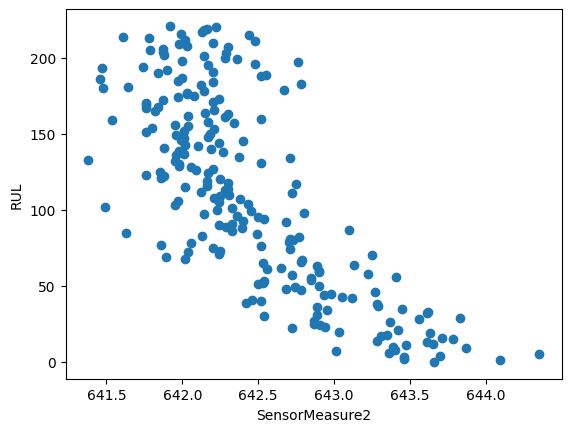

In [13]:
plt.scatter(df['SensorMeasure2'],df['RUL'])
plt.xlabel('SensorMeasure2')
plt.ylabel('RUL')
plt.show()

## Sensor measure also has similar results

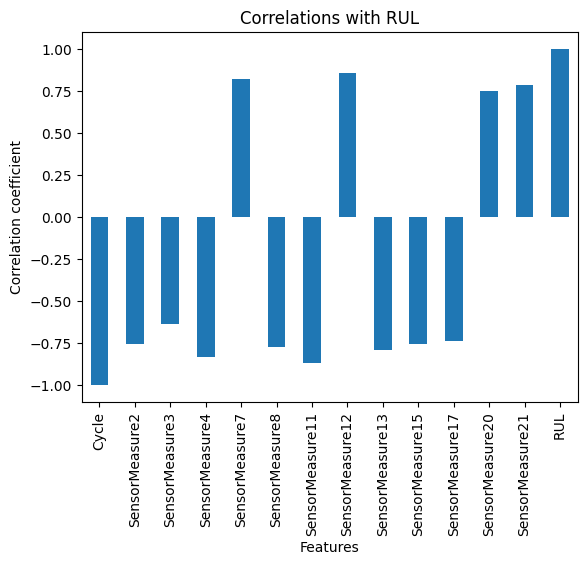

In [14]:
import matplotlib.pyplot as plt


# Compute the correlation coefficients
correlations = df.corr()['RUL']

# Create a bar plot of the correlations
correlations.plot(kind='bar')
plt.title('Correlations with {}'.format('RUL'))
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()


** Most of the features are highly negatively correlated, few are highly positive, 

In [15]:
df.corr()

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
Cycle,1.000000,0.757438,0.637896,0.834873,-0.821509,0.772269,0.870092,-0.854521,0.792360,0.758773,0.736812,-0.749719,-0.783346,-1.000000
SensorMeasure2,0.757438,1.000000,0.627494,0.765553,-0.763405,0.711491,0.803543,-0.791846,0.710653,0.736103,0.663840,-0.728517,-0.696017,-0.757438
SensorMeasure3,0.637896,0.627494,1.000000,0.668007,-0.628358,0.637839,0.686137,-0.667203,0.638600,0.668238,0.616880,-0.646284,-0.646993,-0.637896
SensorMeasure4,0.834873,0.765553,0.668007,1.000000,-0.781753,0.783570,0.841183,-0.864855,0.751364,0.794717,0.740354,-0.750084,-0.736035,-0.834873
SensorMeasure7,-0.821509,-0.763405,-0.628358,-0.781753,1.000000,-0.747126,-0.822974,0.827751,-0.740887,-0.730214,-0.707453,0.771805,0.738429,0.821509
SensorMeasure8,0.772269,0.711491,0.637839,0.783570,-0.747126,1.000000,0.793985,-0.787644,0.707693,0.744764,0.657102,-0.728973,-0.690911,-0.772269
SensorMeasure11,0.870092,0.803543,0.686137,0.841183,-0.822974,0.793985,1.000000,-0.863712,0.804676,0.784369,0.744918,-0.792117,-0.766274,-0.870092
SensorMeasure12,-0.854521,-0.791846,-0.667203,-0.864855,0.827751,-0.787644,-0.863712,1.000000,-0.776495,-0.783730,-0.761335,0.788879,0.759066,0.854521
SensorMeasure13,0.792360,0.710653,0.638600,0.751364,-0.740887,0.707693,0.804676,-0.776495,1.000000,0.758592,0.674062,-0.672773,-0.712276,-0.792360
SensorMeasure15,0.758773,0.736103,0.668238,0.794717,-0.730214,0.744764,0.784369,-0.783730,0.758592,1.000000,0.684160,-0.711454,-0.704096,-0.758773


## taRGET INPUT SPLIT

In [16]:
X=df.drop(columns=['RUL'])
y=df['RUL']

**Data Splitting**

Split the data into two datas 

1.   Train data
2.   Test data



In [17]:
# Spliting the  the train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Linear Regressor**

Linear regression uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values. In Machine Learning, predicting the future is very important.


In [19]:
#import Linear regresion from the sklearn  lib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_test_pred_lr=model.predict(X_test)
mse=mean_squared_error(y_test,y_test_pred_lr)
rmse=np.sqrt(mse)
rmse=np.sqrt(mse)
r2_lr = r2_score(y_test, y_test_pred_lr)*100
print(f"R2 score :\n {r2_lr}")
print('The  Root Mean squared error on the testing data\n',rmse)
print('The Mean Absolute Error on the testing data\n',mean_absolute_error(y_test,y_test_pred_lr))

R2 score :
 100.0
The  Root Mean squared error on the testing data
 9.598548387595505e-14
The Mean Absolute Error on the testing data
 7.988804812870316e-14


**plot for linear regressor**

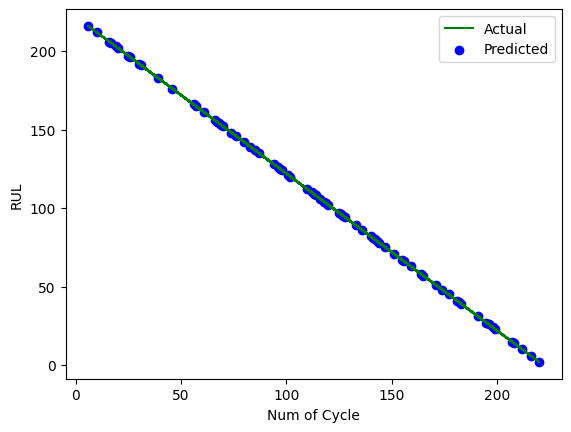

In [27]:
plt.plot(X_test['Cycle'],y_test,color='g',label='Actual')  
plt.scatter(X_test['Cycle'], y_test_pred_lr,color='b',label='Predicted')
plt.xlabel('Num of Cycle')
plt.ylabel('RUL')
plt.legend()
plt.show()

##**Regression Model Implementation**

**Random Forest Regressor**

Random Forests can also be used for regression tasks. A Random Forest's nonlinear nature can give it a leg up over linear algorithms, making it a great option. 

In [28]:
#import RFR from the sk learn Lib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_test_pred_rfr=model.predict(X_test)
mse=mean_squared_error(y_test,y_test_pred_rfr)
rmse=np.sqrt(mse)
r2_rfr = r2_score(y_test, y_test_pred_rfr)*100
print(f"R2 score :\n {r2_rfr}")
print('The  Root Mean squared error on the testing data\n',rmse)
print('The Mean Absolute Error on the testing data\n',mean_absolute_error(y_test,y_test_pred_rfr))

R2 score :
 99.89212556066748
The  Root Mean squared error on the testing data
 1.920286788829041
The Mean Absolute Error on the testing data
 1.532837837837838


**plot random forest Regressor**

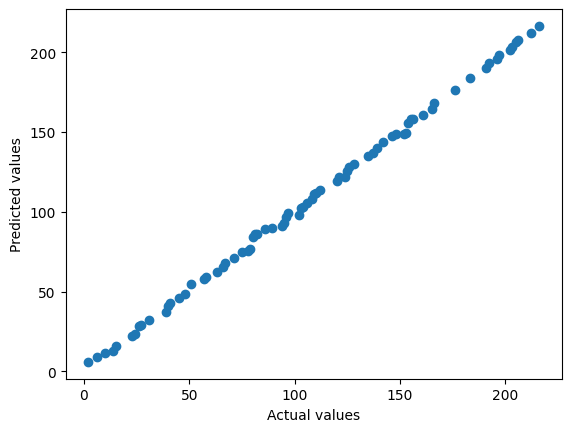

In [29]:
# assume y_test and y_pred_rfr are the true and predicted values, respectively
plt.scatter(y_test, y_test_pred_rfr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

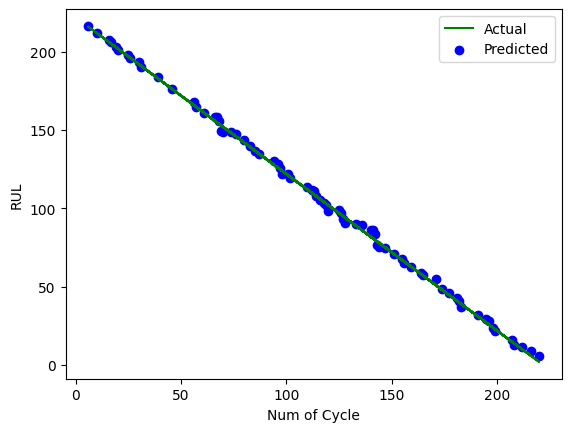

In [31]:
plt.plot(X_test['Cycle'],y_test,color='g',label='Actual')  
plt.scatter(X_test['Cycle'], y_test_pred_rfr,color='b',label='Predicted')
plt.xlabel('Num of Cycle')
plt.ylabel('RUL')
plt.legend()
plt.show()